Data Mining [H02C6a] - Spring 2021

# Session 1: Exploratory Data Analysis with `pandas`

## Exercise 2: Bike Rental Usage Analysis

In this exercise, we explore the bike rental data set using visualisation techniques similar to those of exercise 1.

<img src = '../img/bikes.jpg' width = 25% align = right>

## Background

Bike sharing systems enable users to easily rent a bike from a particular position and return it back at another position. Currently, there are over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. 

Today, there exists a great interest in these systems due to their important role in traffic, environmental and health issues. 


## The data

The data set you are about to explore is related to the two-year historical log corresponding to the years 2011 and 2012 from the Capital Bikeshare system, Washington D.C., USA which is publicly available in http://capitalbikeshare.com/system-data. The data has been aggregated on an hourly basis. Besides, the corresponding weather and seasonal information has been added.

Attributes are as follows:
- **Datetime**: date and time, hourly
- **Season**: 1 - winter, 2 - spring, 3 - summer, 4 - autumn
- **Holiday**: whether the day is considered a holiday
- **Workingday**: whether the day is neither a weekend nor holiday
- **Weather**:
    1. Clear, Few clouds, Partly cloudy, Partly cloudy
    2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
    3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
    4. Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- **Temp**: temperature, Celsius
- **Atemp**: "feels like" temperature, Celsius
- **Humidity**: relative humidity
- **Windspeed**: wind speed
- **Casual**: number of non-registered user rentals initiated
- **Registered**: number of registered user rentals initiated
- **Count**: number of total rentals, *target variable*

Let's get started!

In [1]:
import pandas as pd, numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline

## Loading the data

In [2]:
data = pd.read_csv('../datasets/bikes_train.csv', parse_dates=['datetime'])
print(data.shape)
data.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [3]:
print('The data types are: ')
data.dtypes

The data types are: 


datetime      datetime64[ns]
season                 int64
holiday                int64
workingday             int64
weather                int64
temp                 float64
atemp                float64
humidity             float64
windspeed            float64
casual                 int64
registered             int64
count                  int64
dtype: object

Note that `pandas` doesn't automatically recognize some features to be nominal, since they are encoded with numbers (e.g., `season`, `dayofweek`, etc.). You can fix this malually using `.astype` method if needed.

Briefly discuss the following questions within your group:

<b><font color = 'red'>Question 2.1</font> Why is this data interesting? What can it be used for?</b>

[Your ideas here]
the usage of bike when it comes to weather 

<b><font color = 'red'>Question 2.2</font> What may affect the bike rental process? What patterns do you expect to discover in the data?</b>

[Your ideas here]
weather, dayofweek, season

## Data aggregation

The original dataset contains hourly rental counts, which can be too detailed. 

**<font color='red'>Question 2.3</font> Define a new DataFrame `daily_counts` that contains the total number of rentals (`casual`, `registered` and total `count`) for every day in the database, along with mean temperature, windspeed and humidity values for that day. Indicate the day of week and whether the day is a public holiday.**

Hint: use the <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html?highlight=groupby#pandas.DataFrame.groupby'>`DataFrame.groupby()`</a> and <a href='https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.aggregate.html'>`DataFrame.aggregate()`</a> methods.

In [4]:
# Your code here
daily_counts = data.groupby(data['datetime'].dt.date).aggregate({'holiday':'mean',
                                                               'workingday':'mean',
                                                               'season':'mean',
                                                               'temp':'mean',
                                                               'atemp':'mean',
                                                               'windspeed':'mean',
                                                               'humidity':'mean',
                                                               'registered':'sum',
                                                               'casual':'sum',
                                                               'count':'sum'}, index=False)
daily_counts.reset_index(inplace=True)
daily_counts['datetime'] = pd.to_datetime(daily_counts['datetime'])

**Ectract day of week, month and year as well.**

In [5]:
# Your code here
# Adding day of week
daily_counts['dayofweek'] = daily_counts['datetime'].dt.weekday
# Adding month
daily_counts['month'] = daily_counts['datetime'].dt.month
# Adding year
daily_counts['year'] = daily_counts['datetime'].dt.year

## Data exploration

Explore the dataset and answer the following questions about the bike rental usage applying visualisation techniques similar to those of exercise 1.

Let's start with a general overview.

**<font color = 'red'>Question 2.4</font> Plot the evolution of daily system usage over two years.**

Hint: use the <a href=https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html>`DataFrame.plot`</a> method

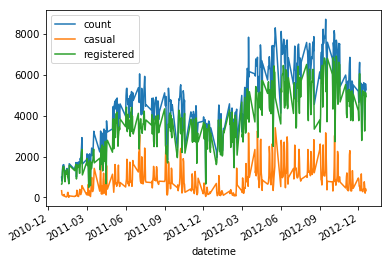

In [10]:
# Your code here
daily_counts.plot(x='datetime',y=['count','casual','registered'])

<b>Looking at the plot, answer the following questions:
* what is the general trend?
* who uses the system more in general: registered or casual users? Is it always so? 
</b>

[Your answer here]

**<font color = 'red'>Question 2.5</font> Plot the average number of daily bike rentals per month in 2011 and 2012.**

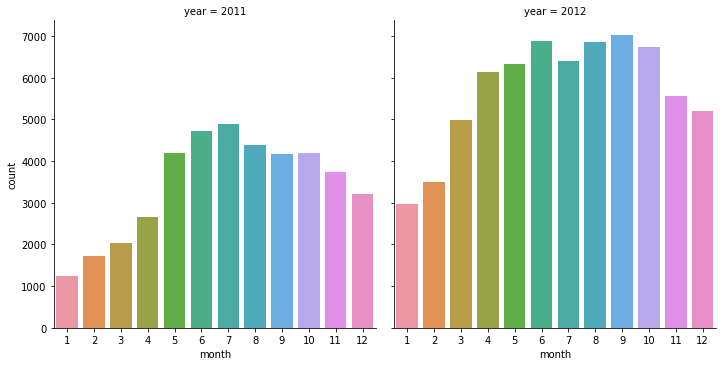

In [14]:
# Your code here
# Your code here
sns.catplot(x='month',y='count', col='year', data=daily_counts, kind='bar',ci=False)

**Which month was the busiest in 2011? And in 2012?**

[Your answer here]

**<font color='red'>Question 2.6</font> Do casual and registered users have different bike rental patterns? If so, explain the difference and posible reasons for it. Make plots to justify your answer.**

[Your answer here]

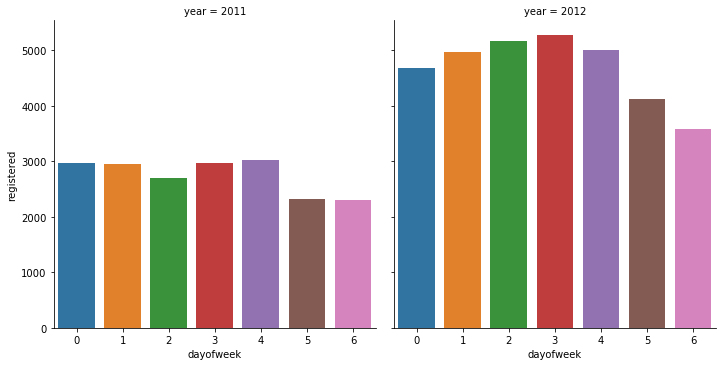

In [19]:
# Your code here
# Your code here
sns.catplot(x='dayofweek',y='registered', col='year', data=daily_counts, kind='bar',ci=False)

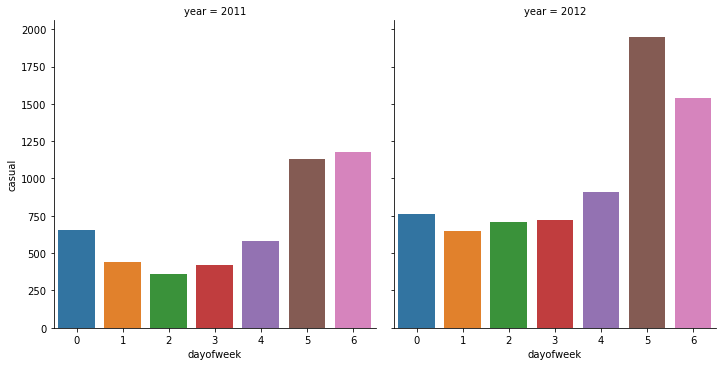

In [18]:
# Your code here
sns.catplot(x='dayofweek',y='casual', col='year', data=daily_counts, kind='bar',ci=False)

**<font color='red'>Question 2.7</font>** What are, on average, the busiest hours (in terms of the total number of rentals)? Are they the same on working and non-working days? Can the same pattern be observed both in 2011 and 2012?

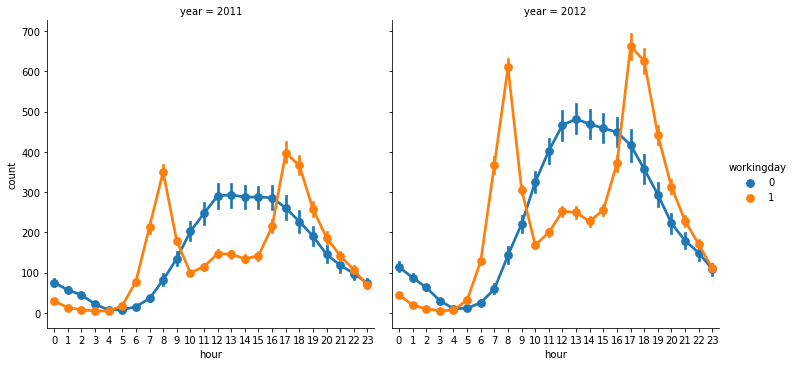

In [20]:
data['hour']=data['datetime'].dt.hour
data['year']=data['datetime'].dt.year
sns.catplot(x='hour', y='count', hue='workingday', col='year', data=data, kind='point');

<b><font color='red'>Question 2.8</font> 

Define a new variable `daytime` as follows:
* 5am - 12pm -> `morning`
* 12pm - 5pm -> `afternoon`
* 5pm - 9pm -> `evening`
* 9pm - 5am -> `night`
</b>

In [21]:
# Your code here
def get_daytime(data):
    daytime = None
    if ((data['hour']>=5) & (data['hour']<12)):
        daytime = 'morning'
    if ((data['hour']>=12) & (data['hour']<17)):
        daytime = 'afternoon'
    if ((data['hour']>=17) & (data['hour']<21)):
        daytime = 'evening'
    if ((data['hour']>=21) | (data['hour']<5)):
        daytime = 'night'
    return daytime
    
data['daytime'] = data.apply(get_daytime, axis=1)

<b>Are the following statements true or false? Make corresponding plots to justify your answer.</b>
<i>
* Casual users rent the highest number of bikes in the afternoon, both on working and non-working days.
* The smallest number of bikes is rented during night hours.
* Registered users rent more bikes on holidays than on working days.
</i>

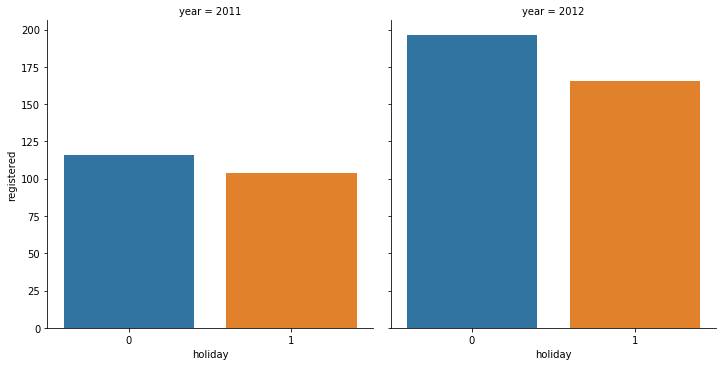

In [25]:
# Your code here
daily_counts['year'] = daily_counts['datetime'].dt.year
sns.catplot(x='holiday', y='registered', col='year', data=data, kind='bar',ci=False);

<b><font color='red'>Question 2.9</font> Is the following statement true or false? Confirm with a plot.</b>

<i>The highest average number of daily bike rentals was recorded on summer days both in 2011 and 2012.</i>


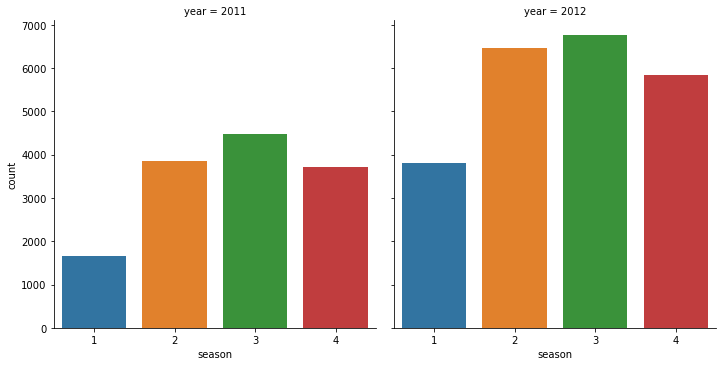

In [26]:
# Your code here
sns.catplot(x='season', y='count', col='year', data=daily_counts, kind='bar',ci=False);

<b><font color='red'>Question 2.10</font> 
<br>
Do weather conditions affect bike rental patterns of registered users? Casual users? 
<br>
Make plots to justify your answer and try to explain the reason for what you see.
</b>

[Your answer here]

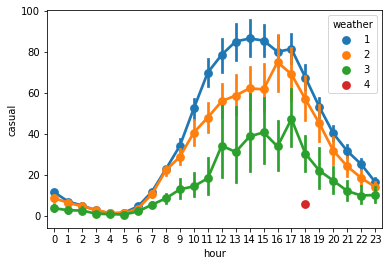

In [29]:
# Your code here

sns.pointplot(x='hour', y='casual', hue='weather', col='year', data=data)


<b><font color='red'>Question 2.11</font> 
<br>
Speaking about the weather, let's see what's the weather like in Washington. Plot the distribution of the temperature over the seasons. </b>

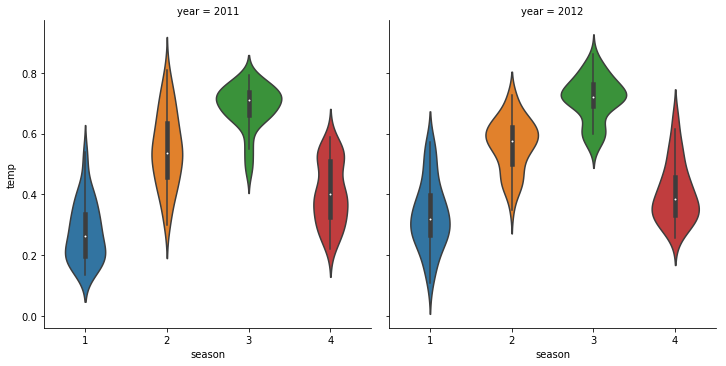

In [31]:
# Your code here
sns.catplot(x='season', y='temp', col='year', data=daily_counts, kind='violin');

**Are the most windy days also the coldest ones? Make a plot to justify your answer.**

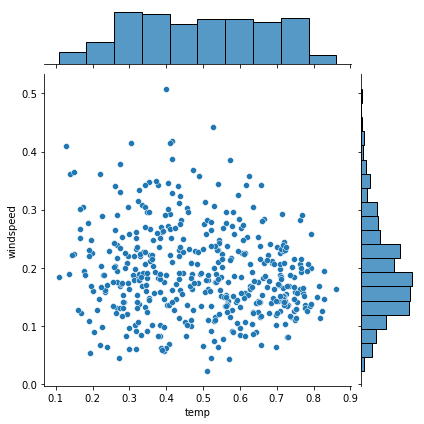

In [32]:
# Your code here
sns.jointplot(x='temp', y='windspeed', data=daily_counts, kind='scatter');

<b>Do such factors as temperature, humidity and windspeed seriously affect the bike rental process? 
<br>
Make plots to justify your answer.
</b>

[Your answer here]

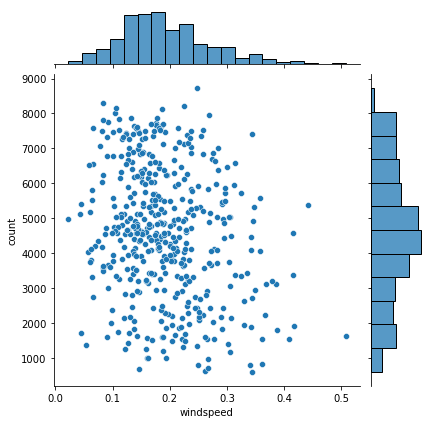

In [35]:
# Your code here
sns.jointplot(x='windspeed', y='count',data=daily_counts, kind='scatter');